20181113

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from PIL import Image

In [2]:
mnist = datasets.fetch_mldata('MNIST original')

In [3]:
s = mnist.data.shape[0]
c = np.zeros(s)
c[np.random.choice(s,1000,replace=False)] = 1
np.sum(c)

1000.0

In [4]:
def load_data(size):
    mnist = datasets.fetch_mldata('MNIST original')
    s = mnist.data.shape[0]
    c = np.zeros(s)
    c[np.random.choice(s,size,replace=False)] = 1
    #n_train = size
    data_train = mnist.data[c==1]
    target_train = mnist.target[c==1]
    data_test = mnist.data[c==0]
    target_test = mnist.target[c==0]
    return (data_train.astype(np.float32), target_train.astype(np.float32),data_test.astype(np.float32), target_test.astype(np.float32))

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [5]:
x_train, t_train, x_test, t_test  = load_data()

TypeError: load_data() missing 1 required positional argument: 'size'

In [45]:
import pickle
def init_network():
    with open('sample_weight.pkl','rb') as f:
        network = pickle.load(f)
    return network

def sigmoid(x):
    return 1/(1+np.exp(-x))
# wrong ?
def softmax_wrong(x):
    c = np.max(x)
    exp_a = np.exp(x-c) #防止溢位
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) 
    return np.exp(x) / np.sum(np.exp(x))



def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3'] 
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3) # 輸出層
    return y

In [ ]:
network = init_network()

In [6]:
%time
x_test_2 = x_test/256 # 0~1 normalize
accuracy_cnt = 0
for i in range(len(x_test_2)):
    y = predict(network,x_test_2[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_cnt += 1
print("Accuracy:%f"%(float(accuracy_cnt)/len(x_test_2)))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


NameError: name 'x_test' is not defined

In [7]:
index = 41654
t_test[index]

NameError: name 't_test' is not defined

In [8]:
plt.matshow(np.uint8(x_test[index]).reshape(28,28), cmap=plt.cm.gray)
plt.show()

NameError: name 'x_test' is not defined

In [9]:
# 預測輸出結果
y = predict(network,x_test_2[index])
np.argmax(y)

NameError: name 'predict' is not defined

In [10]:
%time
batch_size = 100
accuracy_cnt = 0
for i in range(0,len(x_test),batch_size):
    x_batch = x_test_2[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis =1)
    accuracy_cnt += np.sum(p == t_test[i:i+batch_size])
print("Accuracy:%f"%(float(accuracy_cnt)/len(x_test_2)))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


NameError: name 'x_test' is not defined

In [11]:
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

def one_hot_label(y,size):
    a = np.zeros([y.shape[0],size])
    for i in range(y.shape[0]):
        a[i,int(y[i])] = 1
    return a

In [12]:
b = one_hot_label(t_test,10)
b.shape

NameError: name 't_test' is not defined

In [13]:
train = x_test/256
test = t_test
train_size = train.shape[0]
batch_size = 10
# 最後選出的資料集
batch_mask = np.random.choice(train_size,batch_size)
x_batch = train[batch_mask]
t_batch = train[batch_mask]

NameError: name 'x_test' is not defined

In [14]:
# one_hot_vector version
def cross_entorpy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

In [15]:
def numerical_diff(f,x):
    h = 1e-4 # 容許在float32底下運作
    return (f(x+h)-f(x-h))/(2*h)

def function_2(x):
    return np.sum(x**2)

# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/gradient.py
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val)+h
        fxh1= f(x)
        
        x[idx] = float(tmp_val)-h
        fxh2= f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext() 
    return grad

def gradient_descent(f,init_x,lr=0.01,step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

驗證day3 都可以運作

In [16]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

### 開始學習

$$ \bf{W} = 
  \begin{pmatrix}
    w_{11} & w_{21} & w_{31} \\
    w_{12} & w_{22} & w_{32} 
  \end{pmatrix} $$

$$ \frac{\partial L}{\partial \bf{W}} = 
  \begin{pmatrix}
    \frac{\partial L}{\partial w_{11}} &     \frac{\partial L}{\partial w_{21}} &     \frac{\partial L}{\partial w_{31}} \\
\frac{\partial L}{\partial w_{12}} &     \frac{\partial L}{\partial w_{22}} &     \frac{\partial L}{\partial w_{32}} 
  \end{pmatrix} $$


建立簡單神經網路

In [17]:
class SimpleNet:
    def __init__(self):
        #self.W = np.random.rand(2,3) ## 以常態分佈初始化
        self.W = np.array([[0.47355232,0.9977393,0.84668094],
       [0.85557411,0.03563661,0.69422093]])
    def predict(self,x):
        return np.dot(x,self.W)
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entorpy_error(y,t)
        return loss
net = SimpleNet()

In [18]:
net.W

array([[ 0.47355232,  0.9977393 ,  0.84668094],
       [ 0.85557411,  0.03563661,  0.69422093]])

In [19]:
x = np.array([0.6,0.9])
p = net.predict(x)
p

array([ 1.05414809,  0.63071653,  1.1328074 ])

In [20]:
np.argmax(p)

2

In [21]:
t = np.array([0,0,1])
net.loss(x,t)

NameError: name 'softmax' is not defined

In [22]:
# 要留意這裡有目標數值也要帶入 t
def f(W):
    t = np.array([0,0,1])
    return net.loss(x,t)
f = lambda w : net.loss(x,t) #另外一種寫法, 感覺不怎麼好用
dW = numerical_gradient(f,net.W)
dW

NameError: name 'softmax' is not defined

### 執行學習演算法 stochastic gradient descent, SGD
1. 小批次選取資料
2. 計算梯度
3. 更新資料
4. 重複執行

In [46]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std* np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std* np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
        
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']        
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        z2 = sigmoid(a2)
        y = softmax(z2)
        
        return y
    
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entorpy_error(y,t)
    
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_w = lambda W: self.loss(x,t)
        grads = {}
        grads["W1"] = numerical_gradient(loss_w,self.params['W1'])
        grads["W2"] = numerical_gradient(loss_w,self.params['W2'])
        grads["b1"] = numerical_gradient(loss_w,self.params['b1'])
        grads["b2"] = numerical_gradient(loss_w,self.params['b1'])
        return grads

    #額外增加的
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
#為了加速增加的
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [47]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)

In [25]:
net.params['W1'].shape

(784, 100)

In [26]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)
y = net.predict(x)

NameError: name 'sigmoid' is not defined

In [27]:
np.argmax(t,axis=1)

array([0, 3, 7, 2, 3, 1, 5, 9, 9, 9, 7, 9, 0, 5, 2, 4, 2, 5, 5, 6, 2, 7, 0,
       0, 0, 5, 4, 5, 4, 1, 2, 8, 4, 7, 7, 6, 6, 7, 6, 2, 8, 1, 9, 5, 8, 7,
       6, 7, 2, 3, 0, 2, 8, 5, 3, 4, 9, 7, 0, 2, 3, 4, 3, 7, 4, 0, 0, 6, 6,
       6, 9, 5, 1, 9, 8, 3, 6, 6, 3, 8, 9, 0, 1, 6, 5, 4, 9, 9, 5, 0, 1, 0,
       4, 6, 5, 2, 1, 2, 3, 2])

In [28]:
%time
gards = net.numerical_gradient(x,t)
gards

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


NameError: name 'sigmoid' is not defined

## 執行小批次學習

In [29]:
gards = net.gradient(x,t)
gards

NameError: name 'sigmoid' is not defined

In [30]:
def fix(x_train,t_train,x_test,t_test):    
    return x_train/255.0,one_hot_label(t_train,10),x_test/255.0,one_hot_label(t_test,10)
#修改輸入的值 preprocessing
(x_train,t_train,x_test,t_test) = load_data(10000)
(x_train_aha,t_train_aha,x_test_aha,t_test_aha) = fix(x_train,t_train,x_test,t_test)
print(x_train_aha.shape)
print(t_train_aha.shape)
print(x_test_aha.shape)
print(t_test_aha.shape)

(10000, 784)
(10000, 10)
(60000, 784)
(60000, 10)


In [31]:
#保存紀錄訓練狀況
train_loss_list = []

In [32]:
# meta parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [48]:
network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

In [49]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train_aha[batch_mask]
    t_batch = t_train_aha[batch_mask]
    
    #計算梯度
    #grad = network.numerical_gradient(x_batch,t_batch) 好慢啊
    grad = network.gradient(x_batch,t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

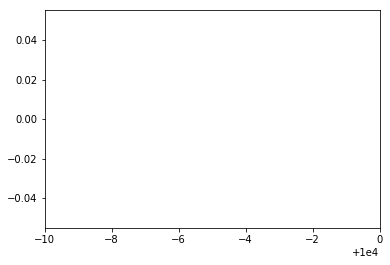

In [35]:
plt.plot(train_loss_list)
plt.xlim(9990,10000)
plt.show()

## 用測試資料做評估
epoch 定義為，假設每次小批次訓練為100, 整體資料數量為10000。那表示每使用100次小批次訓練就能看完所有資料集。這時候 1 epoch = 100


In [53]:
network = pickle.load(open("network.pkl", "rb"))

In [67]:
train_acc_list = [] 
test_acc_list = []
train_loss_list = []
iter_per_epoch = max(train_size/batch_size,1)

In [68]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train_aha[batch_mask]
    t_batch = t_train_aha[batch_mask]
    
    #計算梯度
    #grad = network.numerical_gradient(x_batch,t_batch) 好慢啊
    grad = network.gradient(x_batch,t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train_aha,t_train_aha)
        test_acc = network.accuracy(x_test_aha,t_test_aha)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | %f , %f"%(train_acc,test_acc) )

train acc, test acc | 0.939300 , 0.940150
train acc, test acc | 0.942700 , 0.941200
train acc, test acc | 0.943700 , 0.941617
train acc, test acc | 0.945100 , 0.942650
train acc, test acc | 0.946300 , 0.942467
train acc, test acc | 0.947400 , 0.943450
train acc, test acc | 0.947300 , 0.943083
train acc, test acc | 0.948600 , 0.943100
train acc, test acc | 0.949300 , 0.943400
train acc, test acc | 0.949900 , 0.944117
train acc, test acc | 0.951100 , 0.944083
train acc, test acc | 0.951500 , 0.944350
train acc, test acc | 0.952400 , 0.944717
train acc, test acc | 0.953200 , 0.945100
train acc, test acc | 0.953000 , 0.944567
train acc, test acc | 0.953800 , 0.945133
train acc, test acc | 0.954700 , 0.945067
train acc, test acc | 0.955200 , 0.945633
train acc, test acc | 0.955300 , 0.945767
train acc, test acc | 0.956100 , 0.946083
train acc, test acc | 0.957000 , 0.946067
train acc, test acc | 0.957000 , 0.946817
train acc, test acc | 0.958100 , 0.946350
train acc, test acc | 0.958800 , 0

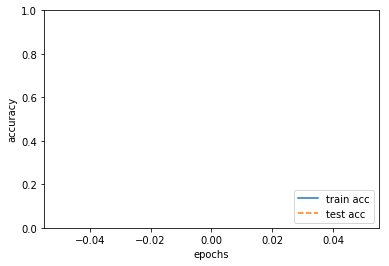

In [38]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [188]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
I5 = Image.open("./4_2.png").convert('L')

In [190]:
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
I5_s = I5.resize((28,28),Image.ANTIALIAS)
#I5_sa = np.array(I5_s)
#print(I5_sa.shape)
#I5_sa[:,:,0]
I5_sa = np.array(I5)
I5_sa[I5_sa!= 0]

array([], dtype=uint8)

In [181]:
# https://stackoverflow.com/questions/384759/how-to-convert-a-pil-image-into-a-numpy-array
I = rgb2gray(I5_sa)
#I.shape
#I = I5_sa
I[I!= 0]

array([], dtype=float64)

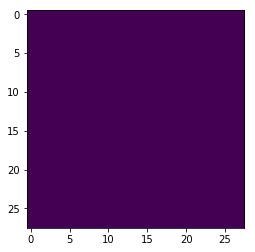

In [155]:
# https://yungyuc.github.io/oldtech/python/python_imaging.html
plt.imshow(I)
plt.show()

In [118]:
np.argmax(network.predict(I.reshape(1,784)/255))

5

In [120]:
if(np.mean(I)>128):
    print(np.argmax(network.predict(1-I.reshape(1,784)/255)))
else:
    print(np.argmax(network.predict(I.reshape(1,784)/255)))

5
